<a href="https://colab.research.google.com/github/Louis5228/Mechine-Learning/blob/main/309512014_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [960]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from numpy.linalg import pinv
drive.mount('/content/gdrive')

dataset_x = pd.read_csv("/content/gdrive/My Drive/Machine_Learning/dataset/data_X.csv")
dataset_t = pd.read_csv("/content/gdrive/My Drive/Machine_Learning/dataset/data_T.csv")
dataset_x = np.array(dataset_x)
dataset_t = np.array(dataset_t)
dataset_x = dataset_x[: , 1:]
dataset_t = dataset_t[: , 1:]

ntarget = dataset_t.shape[0]
ratio = 9/10
ntrain = int(ntarget*ratio) #num of training data
ntest = ntarget - ntrain #num of testing data
D = 7 #Dimension

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2-1 Feature select

In [961]:
# 1.(a)
# Create phi_matrix for M = 1
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = dataset_x[:ntrain,:].T
temp_matrix2_test = dataset_x[ntrain:,:].T
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test))

In [962]:
# Weight for M = 1
w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M1_train = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data
RMS_M1_test = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)

In [963]:
# Create phi_matrix for M = 2
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = dataset_x[:ntrain,:].T
temp_matrix2_test = dataset_x[ntrain:,:].T
temp_matrix3_train = np.zeros((49,ntrain))
for i in range(0,ntrain):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_train[m,i] = dataset_x[i,j] * dataset_x[i,k]
      m = m + 1
temp_matrix3_test = np.zeros((49,ntest))
for i in range(0,ntest):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_test[m,i] = dataset_x[(ntrain+i),j] * dataset_x[(ntrain+i),k]
      m = m + 1
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))

In [964]:
# Weight for M = 2
w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M2_train = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data
RMS_M2_test = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)

In [965]:
print("Polynomial\n")
print("RMS_M1_train: ", RMS_M1_train)
print("RMS_M1_test:  ", RMS_M1_test, "\n")
print("RMS_M2_train: ", RMS_M2_train)
print("RMS_M2_test:  ", RMS_M2_test)

Polynomial

RMS_M1_train:  0.06095143237851235
RMS_M1_test:   0.04559177564490297 

RMS_M2_train:  0.05832880424300963
RMS_M2_test:   0.05160960927185425


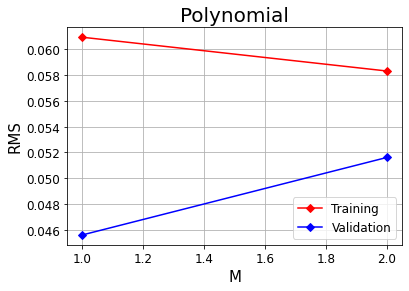

In [966]:
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Polynomial', fontsize = 20)
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.plot([1,2],[RMS_M1_train,RMS_M2_train],color='red',marker = "D",label='Training')
plt.plot([1,2],[RMS_M1_test,RMS_M2_test],color='blue',marker = "D",label='Validation')
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

In [967]:
# 1.(b)
data_no_GRE = np.delete(dataset_x, 0, 1)
data_no_TOFEL = np.delete(dataset_x, 1, 1)
data_no_rating = np.delete(dataset_x, 2, 1)
data_no_SOP = np.delete(dataset_x, 3, 1)
data_no_LOR = np.delete(dataset_x, 4, 1)
data_no_CGPA = np.delete(dataset_x, 5, 1)
data_no_Research = np.delete(dataset_x, 6, 1)

# Create lists
data_list = [data_no_GRE, data_no_TOFEL, data_no_rating, data_no_SOP, data_no_LOR, data_no_CGPA, data_no_Research]
name_list = ['GRE', 'TOFEL', 'rating', 'SOP', 'LOR', 'CGPA', 'Research']
RMS_M1_train_list = list()
RMS_M1_test_list = list()

# Create phi_matri for M = 1
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
for i in range(0,D):
  temp_matrix2_train = data_list[i][:ntrain,:].T
  temp_matrix2_test = data_list[i][ntrain:,:].T
  phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
  phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test))
  # Weight for M = 1
  w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
  RMS_M1_train = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
  RMS_M1_test = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)
  # Add values to lists
  RMS_M1_train_list.append(RMS_M1_train)
  RMS_M1_test_list.append(RMS_M1_test)
  print("Without", name_list[i], ":")
  print("RMS_M1_train: ", RMS_M1_train_list[i])
  print("RMS_M1_test:  ", RMS_M1_test_list[i], "\n")

Without GRE :
RMS_M1_train:  0.06168537344601798
RMS_M1_test:   0.04726488891192383 

Without TOFEL :
RMS_M1_train:  0.06153847066751702
RMS_M1_test:   0.04651775373742274 

Without rating :
RMS_M1_train:  0.06104026570493099
RMS_M1_test:   0.046419125768507326 

Without SOP :
RMS_M1_train:  0.06095422491430103
RMS_M1_test:   0.045392532107397146 

Without LOR :
RMS_M1_train:  0.06233753471870303
RMS_M1_test:   0.04084395015939705 

Without CGPA :
RMS_M1_train:  0.06955775307351288
RMS_M1_test:   0.052307642794294944 

Without Research :
RMS_M1_train:  0.06164217249139676
RMS_M1_test:   0.04784096820965269 



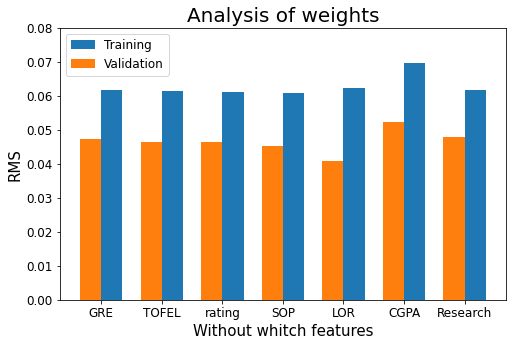

In [968]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.bar(name_list, RMS_M1_train_list, label = 'Training', align = "edge", width = 0.35)
plt.bar(name_list, RMS_M1_test_list, label = 'Validation', align = "edge", width = -0.35)
plt.title("Analysis of weights", fontsize = 20)
plt.xlabel("Without whitch features", fontsize = 15)
plt.ylabel("RMS", fontsize = 15)
plt.ylim(0,0.08)
plt.legend(loc=0, fontsize = 12)
plt.show()

## 2-2 Maximum likelihood approach

In [969]:
# 2.(b)
# Gaussian basis function

# Calculate mean & variance
mu = np.zeros((D,1))
variance = np.zeros((D,1))
for i in range(0,D):
  mu[i] = np.sum(dataset_x[:ntrain,i]) / ntrain
for i in range(0,D):
  variance[i] = np.sum((dataset_x[:ntrain,i] - mu[i])**2) / ntrain

# Expand arrays
mu_train = np.tile(mu,(1,ntrain))
mu_test = np.tile(mu,(1,ntest))
variance_train = np.tile(variance,(1,ntrain))
variance_test = np.tile(variance,(1,ntest))

In [970]:
# Create phi_matrix for M = 1
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = np.exp(-((dataset_x[:ntrain,:].T - mu_train)**2) / (2*variance_train))
temp_matrix2_test = np.exp(-((dataset_x[ntrain:,:].T - mu_test)**2) / (2*variance_test))
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test))

In [971]:
# Weight for M = 1
w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data for M = 1
RMS_M1_train = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data for M = 1 
RMS_M1_test = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)

In [972]:
# Create phi_matrix for M = 2
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = np.exp(-((dataset_x[:ntrain,:].T - mu_train)**2) / (2*variance_train))
temp_matrix2_test = np.exp(-((dataset_x[ntrain:,:].T - mu_test)**2) / (2*variance_test))
temp_matrix3_train = np.zeros((49,ntrain))
for i in range(0,ntrain):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_train[m,i] = np.exp(-(((dataset_x[i,j] - mu[j])**2 / (2*variance[j])) + ((dataset_x[i,k] - mu[k])**2 / (2*variance[k]))))
      m = m + 1
temp_matrix3_test = np.zeros((49,ntest))
for i in range(0,ntest):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_test[m,i] = np.exp(-(((dataset_x[(ntrain+i),j] - mu[j])**2 / (2*variance[j])) + ((dataset_x[(ntrain+i),k] - mu[k])**2 / (2*variance[k]))))
      m = m + 1
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))

In [973]:
# Weight for M = 2
w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M2_train = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data
RMS_M2_test = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)

In [974]:
print("Gaussian\n")
print("RMS_M1_train: ", RMS_M1_train)
print("RMS_M1_test:  ", RMS_M1_test, "\n")
print("RMS_M2_train: ", RMS_M2_train)
print("RMS_M2_test:  ", RMS_M2_test)

Gaussian

RMS_M1_train:  0.11796033218956312
RMS_M1_test:   0.10570638491253403 

RMS_M2_train:  0.09344113230064592
RMS_M2_test:   0.09561352963742394


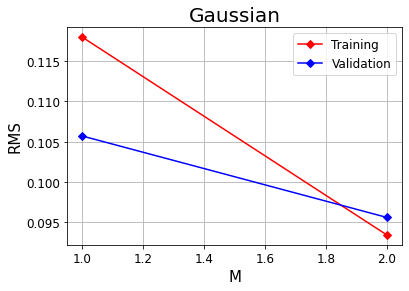

In [975]:
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gaussian', fontsize = 20)
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.plot([1,2],[RMS_M1_train,RMS_M2_train],color='red',marker = "D",label='Training')
plt.plot([1,2],[RMS_M1_test,RMS_M2_test],color='blue',marker = "D",label='Validation')
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

In [976]:
# Sigmoidal basis function
# Create phi_matrix for M = 1
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = 1 / (1 + np.exp(-(dataset_x[:ntrain,:].T - mu_train)))
temp_matrix2_test = 1 / (1 + np.exp(-(dataset_x[ntrain:,:].T - mu_test)))
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test))

In [977]:
# Weight for M = 1
w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data for M = 1
RMS_M1_train = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data for M = 1 
RMS_M1_test = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)

In [978]:
# Create phi_matrix for M = 2
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = 1 / (1 + np.exp(-(dataset_x[:ntrain,:].T - mu_train)))
temp_matrix2_test = 1 / (1 + np.exp(-(dataset_x[ntrain:,:].T - mu_test)))
temp_matrix3_train = np.zeros((49,ntrain))
for i in range(0,ntrain):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_train[m,i] = (1 / (1 + np.exp(-(dataset_x[i,j] - mu[j])))) * (1 / (1 + np.exp(-(dataset_x[i,k] - mu[k]))))
      m = m + 1
temp_matrix3_test = np.zeros((49,ntest))
for i in range(0,ntest):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_test[m,i] = (1 / (1 + np.exp(-(dataset_x[(ntrain+i),j] - mu[j])))) * (1 / (1 + np.exp(-(dataset_x[(ntrain+i),k] - mu[k]))))
      m = m + 1
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))

In [979]:
# Weight for M = 2
w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M2_train = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) / ntrain)
# RMS for testing data
RMS_M2_test = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) / ntest)


In [980]:
print("Sigmoidal\n")
print("RMS_M1_train: ", RMS_M1_train)
print("RMS_M1_test:  ", RMS_M1_test,"\n")
print("RMS_M2_train: ", RMS_M2_train)
print("RMS_M2_test:  ", RMS_M2_test)

Sigmoidal

RMS_M1_train:  0.06278908522875996
RMS_M1_test:   0.05182633693994323 

RMS_M2_train:  0.060233039149453146
RMS_M2_test:   0.053313789580317336


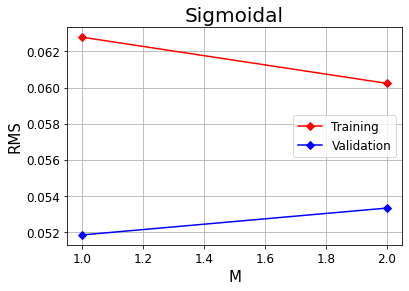

In [981]:
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Sigmoidal', fontsize = 20)
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.plot([1,2],[RMS_M1_train,RMS_M2_train],color='red',marker = "D",label='Training')
plt.plot([1,2],[RMS_M1_test,RMS_M2_test],color='blue',marker = "D",label='Validation')
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

In [982]:
# 2.(c)
# N-fold cross-validation with ML
N = 10
ratio = 1/N
ntest_NFold = int(ntarget * ratio)
ntrain_NFold = ntarget - ntest_NFold
RMS_M1_train = np.zeros((1,N))
RMS_M1_test = np.zeros((1,N))
RMS_M2_train = np.zeros((1,N))
RMS_M2_test = np.zeros((1,N))
for r in range(N):
  dataset_x_test = dataset_x[range((ntest_NFold*r),(ntest_NFold*(r+1))),:]
  dataset_t_test = dataset_t[range((ntest_NFold*r),(ntest_NFold*(r+1))),:]
  dataset_x_train = np.delete(dataset_x, [range((ntest_NFold*r),(ntest_NFold*(r+1)))], axis=0)
  dataset_t_train = np.delete(dataset_t, [range((ntest_NFold*r),(ntest_NFold*(r+1)))], axis=0)
  # Create phi_matrix for M = 1 & M = 2
  temp_matrix1_train = np.ones([1, ntrain_NFold])
  temp_matrix1_test = np.ones([1, ntest_NFold])
  temp_matrix2_train = dataset_x_train.T
  temp_matrix2_test = dataset_x_test.T
  temp_matrix3_train = np.zeros((49,ntrain_NFold))
  for i in range(0,ntrain_NFold):
    m = 0
    for j in range(0,D):
      for k in range(0,D):
        temp_matrix3_train[m,i] = dataset_x_train[i,j] * dataset_x_train[i,k]
        m = m + 1
  temp_matrix3_test = np.zeros((49,ntest_NFold))
  for i in range(0,ntest_NFold):
    m = 0
    for j in range(0,D):
      for k in range(0,D):
        temp_matrix3_test[m,i] = dataset_x_test[i,j] * dataset_x_test[i,k]
        m = m + 1
  phi_matrix_M1_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
  phi_matrix_M1_test = np.vstack((temp_matrix1_test, temp_matrix2_test))
  phi_matrix_M2_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
  phi_matrix_M2_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))
  # Weights for M = 1 & M = 2
  w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_M1_train, phi_matrix_M1_train.T)), phi_matrix_M1_train), dataset_t_train)
  w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_M2_train, phi_matrix_M2_train.T)), phi_matrix_M2_train), dataset_t_train)
  # RMSs
  RMS_M1_train[0,r] = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_M1_train) - dataset_t_train.T)**2) / ntrain_NFold)
  RMS_M1_test[0,r] = math.sqrt(np.sum((np.dot(w_M1.T, phi_matrix_M1_test) - dataset_t_test.T)**2) / ntest_NFold)
  RMS_M2_train[0,r] = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_M2_train) - dataset_t_train.T)**2) / ntrain_NFold)
  RMS_M2_test[0,r] = math.sqrt(np.sum((np.dot(w_M2.T, phi_matrix_M2_test) - dataset_t_test.T)**2) / ntest_NFold)

a = [RMS_M1_train, RMS_M1_test, RMS_M2_train, RMS_M2_test]
name = ['RMS_M1_train', 'RMS_M1_test', 'RMS_M2_train', 'RMS_M2_test']
print("N-fold cross-validation with ML\n")
for i in range(4):
  mu = np.mean(a[i])
  variance = np.var(a[i])
  print(name[i], ":")
  print("mean:     ", mu)
  print("variance: ", variance, "\n")

# print("RMS_M1_train: ", RMS_M1_train)
# print("RMS_M1_test:  ", RMS_M1_test)
# print("RMS_M2_train: ", RMS_M2_train)
# print("RMS_M2_test:  ", RMS_M2_test)
# print("\n")

N-fold cross-validation with ML

RMS_M1_train :
mean:      0.0593113767871043
variance:  8.109442468940044e-06 

RMS_M1_test :
mean:      0.058225498477515604
variance:  0.00043942534086194394 

RMS_M2_train :
mean:      0.05662403816652206
variance:  6.603056004833078e-06 

RMS_M2_test :
mean:      0.062252808785435244
variance:  0.0004380016477467137 



# 3 Maximum a posterior approach

In [983]:
# (b)
Lambda = 0.1
# Create phi_matrix for M = 1
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = dataset_x[:ntrain,:].T
temp_matrix2_test = dataset_x[ntrain:,:].T
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test))

In [984]:
# Weight for M = 1 with lambda
w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T) + Lambda*np.eye(D+1)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M1_train = math.sqrt((np.sum((np.dot(w_M1.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) + Lambda*np.dot(w_M1.T,w_M1)) / ntrain)
# RMS for testing data
RMS_M1_test = math.sqrt((np.sum((np.dot(w_M1.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) + Lambda*np.dot(w_M1.T,w_M1)) / ntest)

In [985]:
# Create phi_matrix for M = 2
temp_matrix1_train = np.ones([1, ntrain])
temp_matrix1_test = np.ones([1, ntest])
temp_matrix2_train = dataset_x[:ntrain,:].T
temp_matrix2_test = dataset_x[ntrain:,:].T
temp_matrix3_train = np.zeros((49,ntrain))
for i in range(0,ntrain):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_train[m,i] = dataset_x[i,j] * dataset_x[i,k]
      m = m + 1
temp_matrix3_test = np.zeros((49,ntest))
for i in range(0,ntest):
  m = 0
  for j in range(0,D):
    for k in range(0,D):
      temp_matrix3_test[m,i] = dataset_x[(ntrain+i),j] * dataset_x[(ntrain+i),k]
      m = m + 1
phi_matrix_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
phi_matrix_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))

In [986]:
# Weight for M = 2 with lambda
w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_train, phi_matrix_train.T) + Lambda*np.eye(1+D+D**2)), phi_matrix_train), dataset_t[:ntrain, :])
# RMS for training data
RMS_M2_train = math.sqrt((np.sum((np.dot(w_M2.T, phi_matrix_train) - dataset_t[:ntrain, :].T)**2) + Lambda*np.dot(w_M2.T,w_M2)) / ntrain)
# RMS for testing data
RMS_M2_test = math.sqrt((np.sum((np.dot(w_M2.T, phi_matrix_test) - dataset_t[ntrain:, :].T)**2) + Lambda*np.dot(w_M2.T,w_M2)) / ntest)
print("Polynomial")
print("lambda = ", Lambda, "\n")
print("RMS_M1_train_with_lambda: ", RMS_M1_train)
print("RMS_M1_test_with_lambda:  ", RMS_M1_test,"\n")
print("RMS_M2_train_with_lambda: ", RMS_M2_train)
print("RMS_M2_test_with_lambda:  ", RMS_M2_test)

Polynomial
lambda =  0.1 

RMS_M1_train_with_lambda:  0.06316570857304941
RMS_M1_test_with_lambda:   0.06306933971315273 

RMS_M2_train_with_lambda:  0.05852795272158788
RMS_M2_test_with_lambda:   0.049883038573420996


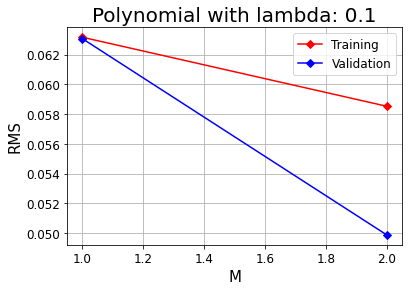

In [987]:
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Polynomial with lambda: '+str(Lambda), fontsize = 20)
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.plot([1,2],[RMS_M1_train,RMS_M2_train],color='red',marker = "D",label='Training')
plt.plot([1,2],[RMS_M1_test,RMS_M2_test],color='blue',marker = "D",label='Validation')
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

In [988]:
# N-fold cross-validation with MAP
N = 10
ratio = 1/N
ntest_NFold = int(ntarget * ratio)
ntrain_NFold = ntarget - ntest_NFold
RMS_M1_train = np.zeros((1,N))
RMS_M1_test = np.zeros((1,N))
RMS_M2_train = np.zeros((1,N))
RMS_M2_test = np.zeros((1,N))
for r in range(N):
  dataset_x_test = dataset_x[range((ntest_NFold*r),(ntest_NFold*(r+1))),:]
  dataset_t_test = dataset_t[range((ntest_NFold*r),(ntest_NFold*(r+1))),:]
  dataset_x_train = np.delete(dataset_x, [range((ntest_NFold*r),(ntest_NFold*(r+1)))], axis=0)
  dataset_t_train = np.delete(dataset_t, [range((ntest_NFold*r),(ntest_NFold*(r+1)))], axis=0)
  # Create phi_matrix for M = 1 & M = 2
  temp_matrix1_train = np.ones([1, ntrain_NFold])
  temp_matrix1_test = np.ones([1, ntest_NFold])
  temp_matrix2_train = dataset_x_train.T
  temp_matrix2_test = dataset_x_test.T
  temp_matrix3_train = np.zeros((49,ntrain_NFold))
  for i in range(0,ntrain_NFold):
    m = 0
    for j in range(0,D):
      for k in range(0,D):
        temp_matrix3_train[m,i] = dataset_x_train[i,j] * dataset_x_train[i,k]
        m = m + 1
  temp_matrix3_test = np.zeros((49,ntest_NFold))
  for i in range(0,ntest_NFold):
    m = 0
    for j in range(0,D):
      for k in range(0,D):
        temp_matrix3_test[m,i] = dataset_x_test[i,j] * dataset_x_test[i,k]
        m = m + 1
  phi_matrix_M1_train = np.vstack((temp_matrix1_train, temp_matrix2_train))
  phi_matrix_M1_test = np.vstack((temp_matrix1_test, temp_matrix2_test))
  phi_matrix_M2_train = np.vstack((temp_matrix1_train, temp_matrix2_train, temp_matrix3_train))
  phi_matrix_M2_test = np.vstack((temp_matrix1_test, temp_matrix2_test, temp_matrix3_test))
  # Weights for M = 1 & M = 2
  w_M1 = np.dot(np.dot(pinv(np.dot(phi_matrix_M1_train, phi_matrix_M1_train.T) + Lambda*np.eye(D+1)), phi_matrix_M1_train), dataset_t_train)
  w_M2 = np.dot(np.dot(pinv(np.dot(phi_matrix_M2_train, phi_matrix_M2_train.T) + Lambda*np.eye(1+D+D**2)), phi_matrix_M2_train), dataset_t_train)
  # RMSs
  RMS_M1_train[0,r] = math.sqrt((np.sum((np.dot(w_M1.T, phi_matrix_M1_train) - dataset_t_train.T)**2) + Lambda*np.dot(w_M1.T,w_M1)) / ntrain_NFold)
  RMS_M1_test[0,r] = math.sqrt((np.sum((np.dot(w_M1.T, phi_matrix_M1_test) - dataset_t_test.T)**2) + Lambda*np.dot(w_M1.T,w_M1)) / ntest_NFold)
  RMS_M2_train[0,r] = math.sqrt((np.sum((np.dot(w_M2.T, phi_matrix_M2_train) - dataset_t_train.T)**2) + Lambda*np.dot(w_M2.T,w_M2)) / ntrain_NFold)
  RMS_M2_test[0,r] = math.sqrt((np.sum((np.dot(w_M2.T, phi_matrix_M2_test) - dataset_t_test.T)**2) + Lambda*np.dot(w_M2.T,w_M2)) / ntest_NFold)

a = [RMS_M1_train, RMS_M1_test, RMS_M2_train, RMS_M2_test]
name = ['RMS_M1_train', 'RMS_M1_test', 'RMS_M2_train', 'RMS_M2_test']
print("N-fold cross-validation with MAP\n")
for i in range(4):
  mu = np.mean(a[i])
  variance = np.var(a[i])
  print(name[i], ":")
  print("mean:     ", mu)
  print("variance: ", variance, "\n")

N-fold cross-validation with MAP

RMS_M1_train :
mean:      0.061576845913199896
variance:  8.102784571076458e-06 

RMS_M1_test :
mean:      0.07381409987728829
variance:  0.00031440976018294863 

RMS_M2_train :
mean:      0.05683214259208362
variance:  6.556640630596912e-06 

RMS_M2_test :
mean:      0.06177471083894624
variance:  0.0004062184103747651 

